# Problem Statement
> Here, we have to build a model to predict the sale price of a house based on the given dataset. Also, we have to make those predictions for the test set.

# Data 
> The dataset for this regression model is taken from the "House Prices - Advanced Regression Techniques" competition : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

# Evaluation
>The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
For more on evaluations of this project, check : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a ml model which minimizes RMSLE.

In [1]:
## Import required tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score


In [2]:
## Let's import the data
df = pd.read_csv('data/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


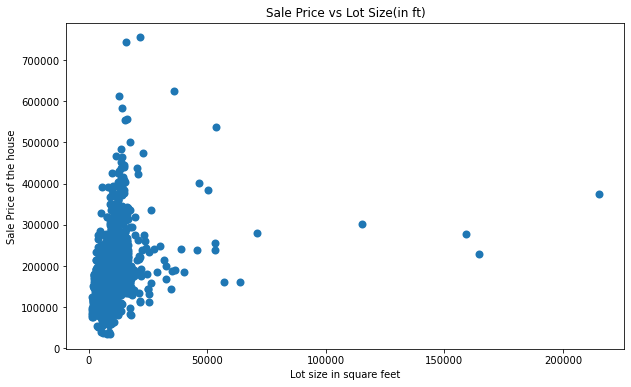

In [6]:
## Let's plot Sale Price vs Lot Size

fig, ax = plt.subplots(figsize = (10,6))

ax.scatter(df.LotArea, df.SalePrice, linewidth=2.0)
plt.xlabel('Lot size in square feet')
plt.ylabel('Sale Price of the house')
plt.title('Sale Price vs Lot Size(in ft)');

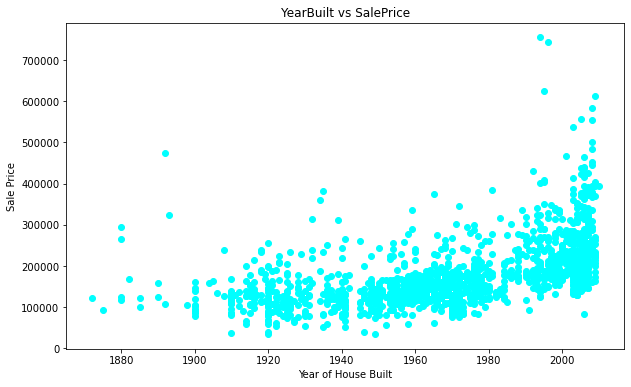

In [7]:
## Let's see how built year affects the price

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df.YearBuilt, df.SalePrice, color='cyan')
plt.xlabel("Year of House Built")
plt.ylabel("Sale Price")
plt.title("YearBuilt vs SalePrice");

## Let's clean the data

In [8]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
# Numerical labels with missing values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [10]:
df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [11]:
df['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [12]:
df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [13]:
## Let's fill the numeric values with the median

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        df[label+"_is_missing"] = pd.isnull(content)
        
        if pd.isnull(content).sum():
            df[label] = df[label].fillna(content.median())

In [14]:
# Numerical labels with missing values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 119 entries, Id to SalePrice_is_missing
dtypes: bool(38), float64(3), int64(35), object(43)
memory usage: 978.2+ KB


In [16]:
## Now let's consider non numeric values
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
### Let's turn the non-numeric categorical values into numeric codes

for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label+"_is_missing"] = pd.isnull(content)
        
        df[label] = pd.Categorical(content).codes + 1

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 162 entries, Id to SaleCondition_is_missing
dtypes: bool(81), float64(3), int64(35), int8(43)
memory usage: 610.4 KB


In [20]:
df.isna().sum()

Id                          0
MSSubClass                  0
MSZoning                    0
LotFrontage                 0
LotArea                     0
                           ..
PoolQC_is_missing           0
Fence_is_missing            0
MiscFeature_is_missing      0
SaleType_is_missing         0
SaleCondition_is_missing    0
Length: 162, dtype: int64

In [21]:
df.drop('SalePrice_is_missing', axis=1, inplace=True)

In [22]:
## Let's split the data for model evaluation

np.random.seed(25)
x = df.drop('SalePrice', axis=1)
y = df.SalePrice

In [23]:
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1,60,4,65.0,8450,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,4,62.0,7917,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1456,1457,20,4,85.0,13175,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1457,1458,70,4,66.0,9042,2,0,4,4,1,...,False,False,False,False,False,True,False,False,False,False
1458,1459,20,4,68.0,9717,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False


In [24]:
## Let's split them into train, test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Let's build an evaluation model

In [25]:
def rmsle(y_test, y_preds):
    """
    Calculates "root mean squared log error" between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))


def show_scores(model):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    
    scores={'Train MAE': mean_absolute_error(y_train, train_preds),
            'Test MAE': mean_absolute_error(y_test, test_preds),
            'Train RMSLE': rmsle(y_train, train_preds),
            'Test RMSLE': rmsle(y_test, test_preds),
            'Training R^2': r2_score(y_train, train_preds),
            'Test R^2': r2_score(y_test, test_preds)}
    return scores
    

In [26]:
## Let's fit a model

model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [27]:
show_scores(model)

{'Train MAE': 6591.508476027398,
 'Test MAE': 18406.738287671233,
 'Train RMSLE': 0.06267203651018846,
 'Test RMSLE': 0.13927438407936127,
 'Training R^2': 0.9779078603970659,
 'Test R^2': 0.8802219666737354}

## Let's tune the hyperparameters

In [28]:
## GridSearchCV

gs_grid = {'n_estimators': np.arange(5, 101, 5),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 10, 2)}

gs_model = GridSearchCV(RandomForestRegressor(n_jobs=-1),
                       param_grid=gs_grid,
                        cv=5,
                        verbose=True)


In [28]:
%%time
gs_model.fit(x_train, y_train)

In [29]:
## This gives the best combination of hyperparameters

gs_model.best_params_

In [30]:
show_scores(gs_model)

In [29]:
# import test set

dft = pd.read_csv('data/test.csv')
dft

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [30]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [31]:
## Let's fill the null values in test set

for label, content in dft.items():
    if pd.api.types.is_numeric_dtype(content):
        dft[label+"_is_missing"] = pd.isnull(content)
        
        if pd.isnull(content).sum():
            dft[label] = dft[label].fillna(content.median())

In [32]:
## Let's fill and categorize non-numeric values

for label, content in dft.items():
    if not pd.api.types.is_numeric_dtype(content):
        dft[label+"_is_missing"] = pd.isnull(content)
        
        dft[label] = pd.Categorical(content).codes + 1

In [33]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 160 entries, Id to SaleCondition_is_missing
dtypes: bool(80), float64(11), int64(26), int8(43)
memory usage: 597.1 KB


In [34]:
dft.isna().sum()

Id                          0
MSSubClass                  0
MSZoning                    0
LotFrontage                 0
LotArea                     0
                           ..
PoolQC_is_missing           0
Fence_is_missing            0
MiscFeature_is_missing      0
SaleType_is_missing         0
SaleCondition_is_missing    0
Length: 160, dtype: int64

In [35]:
## Let's make predictions for the test set

test_preds = gs_model.predict(dft)

In [36]:
test_preds

array([123896.83, 151803.34, 174151.04, ..., 145969.27, 112591.5 ,
       233229.38])

In [37]:
## Let's build a DataFrame (with just Id and SalePrice)

submission = pd.DataFrame()

In [38]:
submission['Id'] = dft['Id']
submission['SalePrice'] = test_preds

In [39]:
submission

,Id,SalePrice
0,1461,123896.83
1,1462,151803.34
2,1463,174151.04
3,1464,177296.34
4,1465,197794.37
...,...,...
1454,2915,85937.00
1455,2916,83821.93
1456,2917,145969.27
1457,2918,112591.50
